In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
raw_welfare = pd.read_spss('./data/Koweps_hpwc14_2019_beta2.sav')

In [3]:
welfare = raw_welfare.copy()

In [4]:
welfare = welfare.rename(
    columns = {
        'h14_g3' : 'sex',
        'h14_g4' : 'birth',
        'h14_g10' : 'marriage_type',
        'h14_g11' : 'religon',
        'p1402_8aq1' : 'income',
        'h14_eco9' : 'code_job',
        'h14_reg7' : 'code_region'
    }
)

#### 성별에 따른 월급 차이

In [5]:
welfare['sex'].dtypes

dtype('float64')

In [6]:
welfare['sex'].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [7]:
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])
welfare['sex'].isna().sum()

0

In [8]:
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

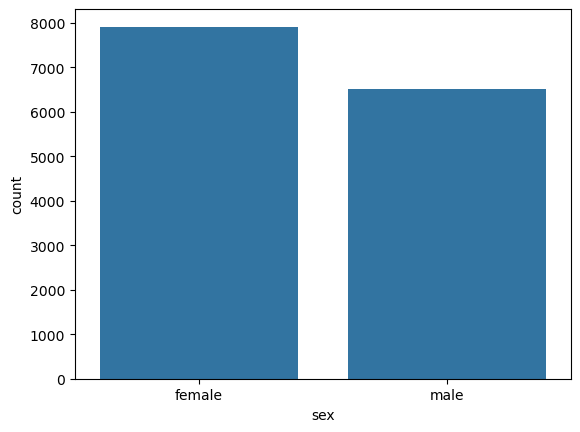

In [9]:
sns.countplot(data = welfare, x = 'sex')

In [10]:
welfare['income'].dtypes

dtype('float64')

In [11]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

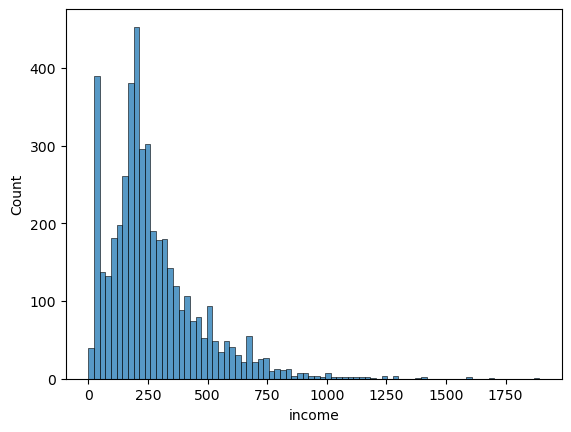

In [12]:
sns.histplot(data = welfare, x = 'income')

In [13]:
welfare['income'].isna().sum()

9884

In [14]:
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])
welfare['income'].isna().sum()

9884

In [15]:
sex_income = welfare.dropna(subset = ['income'])\
    .groupby('sex', as_index = False)\
    .agg(mean_income = ('income', 'mean'))

sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


<Axes: xlabel='sex', ylabel='mean_income'>

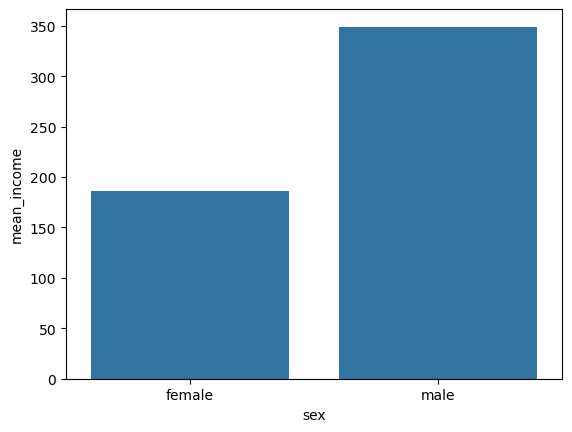

In [16]:
sns.barplot(data = sex_income, x = 'sex', y = 'mean_income')

#### 나이와 월급의 관계

In [17]:
welfare['birth'].dtypes

dtype('float64')

In [18]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

<Axes: xlabel='birth', ylabel='Count'>

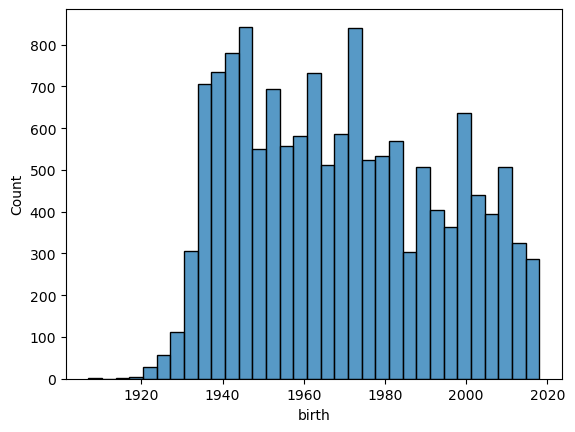

In [19]:
sns.histplot(data = welfare, x = 'birth')

In [20]:
welfare['birth'] = np.where(welfare['birth'] == 9999, np.nan, welfare['birth'])

In [21]:
welfare['birth'].isna().sum()

0

In [22]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

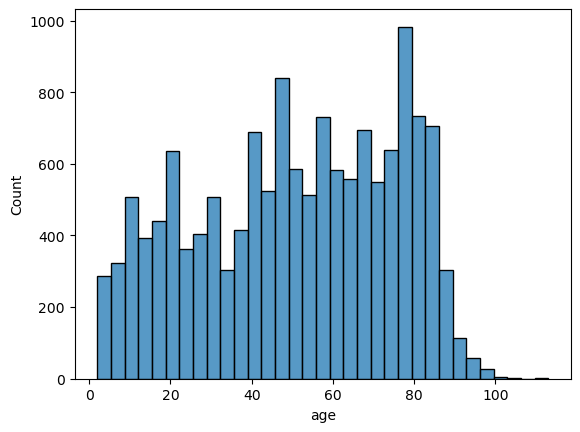

In [23]:
sns.histplot(data = welfare, x = 'age')

In [24]:
age_income = welfare.dropna(subset=['income'])\
    .groupby('age', as_index = False)\
    .agg(mean_income =('income', 'mean'))
age_income

,age,mean_income
0,19.0,162.000000
1,20.0,121.333333
2,21.0,136.400000
3,22.0,123.666667
4,23.0,179.676471
...,...,...
69,88.0,27.000000
70,89.0,27.000000
71,90.0,27.000000
72,91.0,20.000000


<Axes: xlabel='age', ylabel='mean_income'>

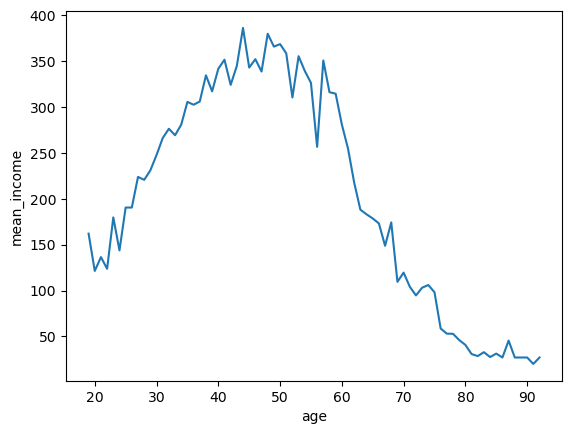

In [25]:
sns.lineplot(data = age_income, x = 'age', y = 'mean_income')

#### 연령대에 따른 월급 차이

In [26]:
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [27]:
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young', 
                                        np.where(welfare['age'] <= 59, 'middle', 'old')))

<Axes: xlabel='ageg', ylabel='count'>

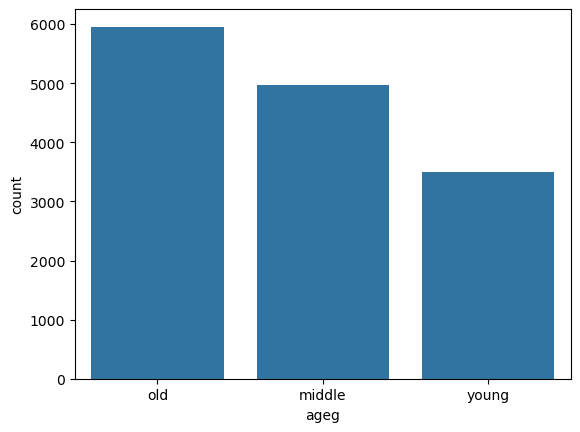

In [28]:
sns.countplot(data = welfare, x = 'ageg')

In [29]:
ageg_income = welfare.dropna(subset = ['income'])\
    .groupby('ageg', as_index = False)\
    .agg(ageg_income = ('income', 'mean'))

In [30]:
ageg_income

,ageg,ageg_income
0,middle,329.157157
1,old,140.129003
2,young,195.663424


<Axes: xlabel='ageg', ylabel='ageg_income'>

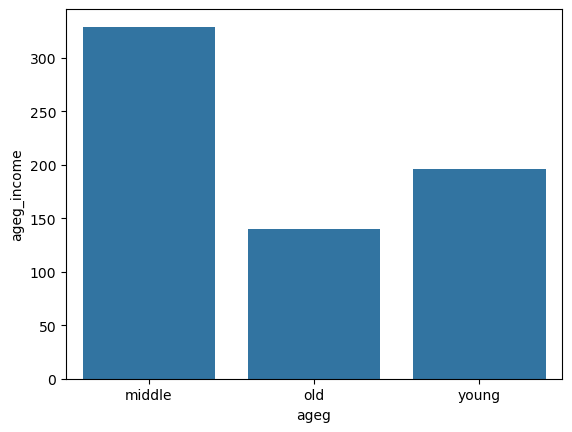

In [31]:
sns.barplot(data = ageg_income, x = 'ageg', y = 'ageg_income')

<Axes: xlabel='ageg', ylabel='ageg_income'>

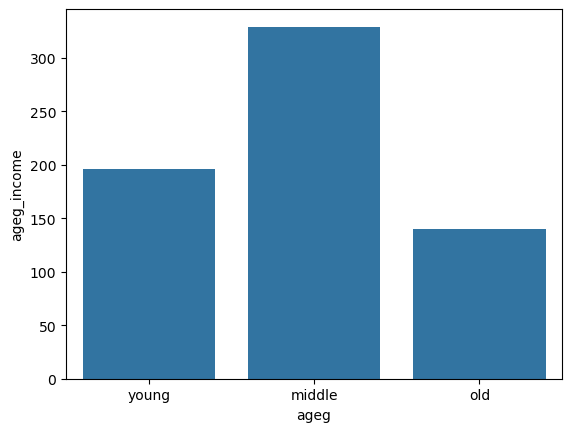

In [32]:
sns.barplot(data = ageg_income, x = 'ageg', y = 'ageg_income', order = ['young', 'middle', 'old'])

In [33]:
sex_income = \
    welfare.dropna(subset = ['income'])\
    .groupby(['ageg', 'sex'], as_index = False)\
    .agg(mean_income = ('income', 'mean'))

<Axes: xlabel='ageg', ylabel='mean_income'>

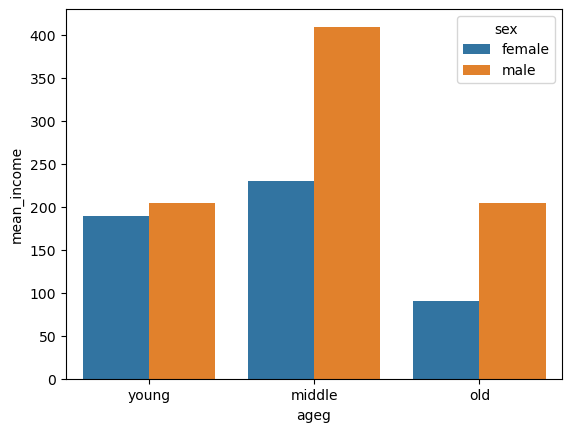

In [34]:
sns.barplot(data = sex_income, x = 'ageg', y = 'mean_income', hue = 'sex', order = ['young', 'middle', 'old'])

In [35]:
sex_age = welfare.dropna(subset = 'income')\
    .groupby(['age', 'sex'], as_index = False)\
    .agg(mean_income = ('income', 'mean'))
sex_age

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000
...,...,...,...
140,89.0,male,27.000000
141,90.0,female,27.000000
142,91.0,female,27.000000
143,91.0,male,13.000000


<Axes: xlabel='age', ylabel='mean_income'>

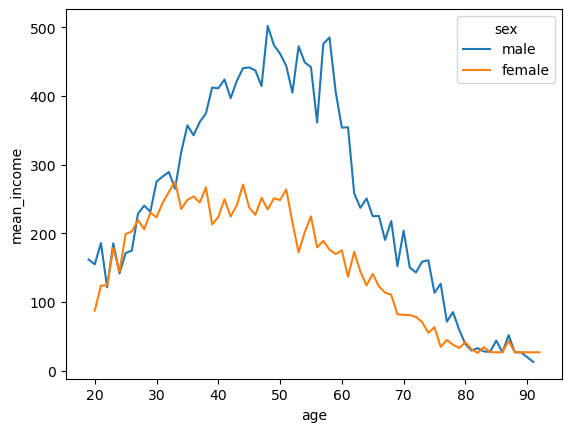

In [36]:
sns.lineplot(data = sex_age, x = 'age', y = 'mean_income', hue = 'sex')

#### 직업별 월급 차이

In [37]:
welfare['code_job'].dtype

dtype('float64')

In [38]:
welfare['code_job'].value_counts()

code_job
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: count, Length: 150, dtype: int64

In [39]:
list_job = pd.read_excel('./data/Koweps_Codebook_2019.xlsx', sheet_name = '직종코드')
list_job

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자
...,...,...
151,992,계기∙자판기 및 주차 관리 종사자
152,999,기타 서비스 관련 단순 종사자
153,1001,장교
154,1002,부사관


In [40]:
welfare = welfare.merge(list_job, how= 'left', on = 'code_job')

In [41]:
welfare.dropna(subset = ['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [42]:
job_income = welfare.dropna(subset = ['income'])\
    .groupby('job', as_index = False)\
    .agg(mean_income = ('income', 'mean'))

In [43]:
top10 = job_income.sort_values('mean_income', ascending = False)
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
...,...,...
43,돌봄 및 보건 서비스 종사자,117.162338
0,가사 및 육아 도우미,92.455882
128,청소원 및 환경미화원,88.461756
34,기타 서비스 관련 단순 종사자,77.789474


In [44]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

<Axes: xlabel='mean_income', ylabel='job'>

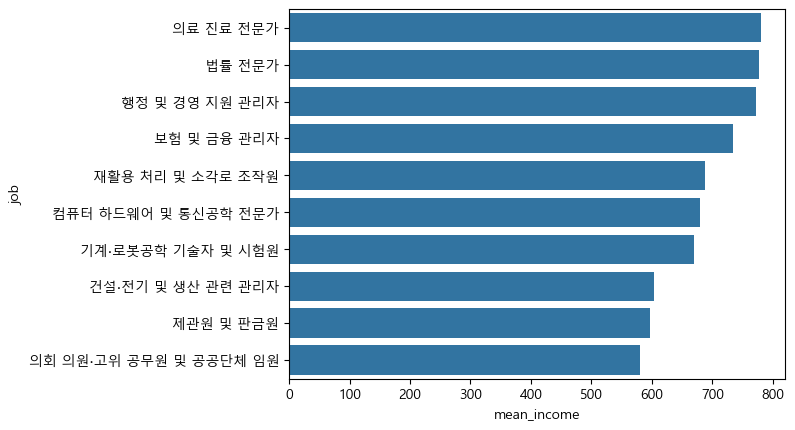

In [45]:
sns.barplot(data = top10.head(10), y = 'job', x = 'mean_income')

In [46]:
bottom10 = job_income.sort_values('mean_income').head(10)

[(0.0, 800.0)]

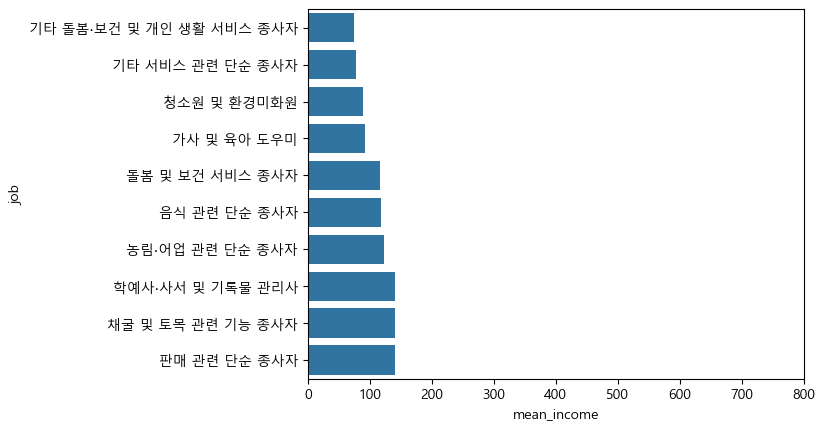

In [47]:
sns.barplot(data = bottom10, y = 'job', x = 'mean_income').set(xlim = (0, 800))

#### 성별 직업 빈도

In [48]:
job_male = welfare.dropna(subset = ['job'])\
    .query('sex == "male"')\
    .groupby('job', as_index = False)\
    .agg(n = ('job', 'count'))\
    .sort_values('n', ascending = False)\
    .head(10)

job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [49]:
job_female = welfare.dropna(subset = ['job'])\
    .query('sex == "female"')\
    .groupby('job', as_index = False)\
    .agg(n = ('job', 'count'))\
    .sort_values('n', ascending = False)\
    .head(10)

job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


[(0.0, 500.0)]

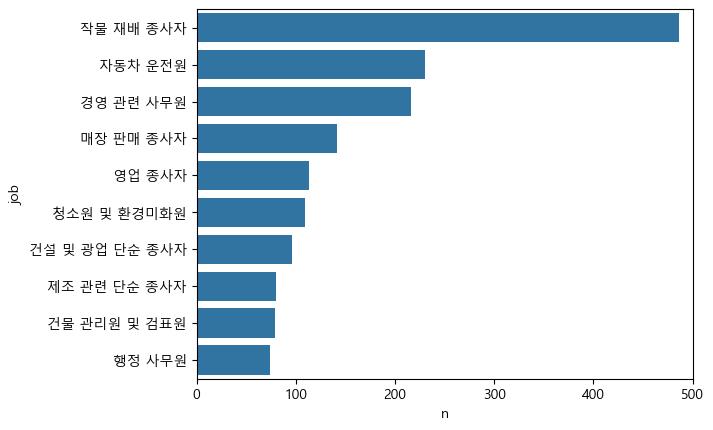

In [50]:
sns.barplot(data = job_male, y = 'job', x = 'n').set(xlim = (0, 500))

[(0.0, 500.0)]

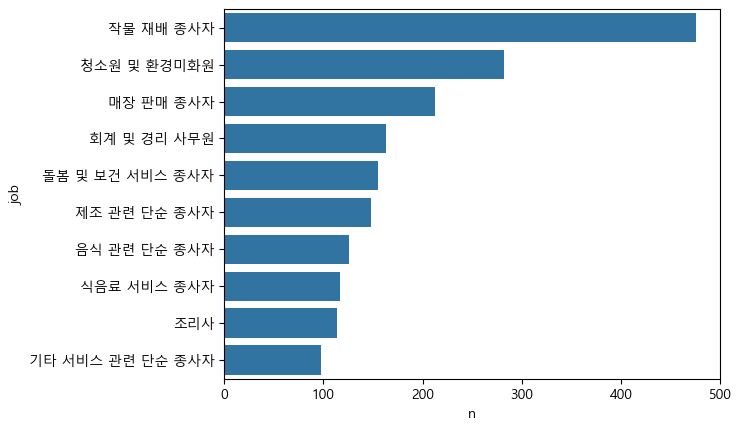

In [51]:
sns.barplot(data = job_female, y = 'job', x = 'n').set(xlim = (0, 500))

#### 종교 유무에 따른 이혼율

In [52]:
welfare['religon'].dtypes

dtype('float64')

In [53]:
welfare['religon'] = np.where(welfare['religon'] == 1, 'yes', 'no')
welfare['religon'].value_counts()

religon
no     7815
yes    6603
Name: count, dtype: int64

<Axes: xlabel='religon', ylabel='count'>

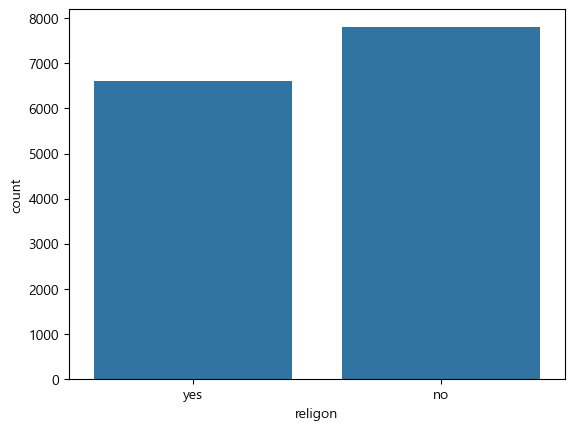

In [54]:
sns.countplot(data = welfare , x = 'religon')

In [55]:
welfare['marriage_type'].dtypes

dtype('float64')

In [56]:
welfare['marriage_type'].value_counts()

marriage_type
1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: count, dtype: int64

In [57]:
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage',
                             np.where(welfare['marriage_type'] == 3, 'divorce', 'etc'))


In [58]:
n_divorce = welfare.groupby('marriage', as_index = False).agg(n = ('marriage', 'count'))
n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


<Axes: xlabel='marriage', ylabel='n'>

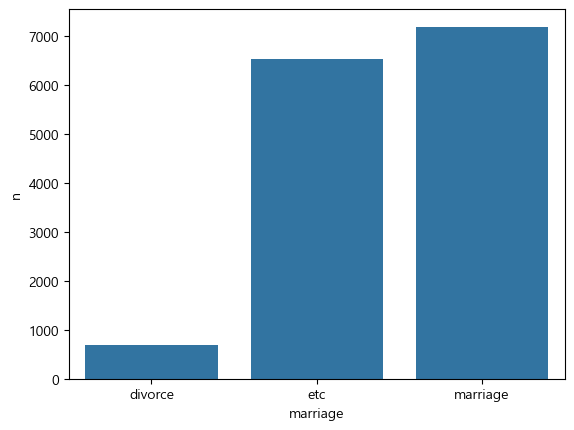

In [59]:
sns.barplot(data = n_divorce, x = 'marriage', y = 'n')

In [60]:
rel_div = welfare.query('marriage != "etc"')\
    .groupby('religon', as_index = False)\
    ['marriage']\
    .value_counts(normalize=True)
rel_div

,religon,marriage,proportion
0,no,marriage,0.905045
1,no,divorce,0.094955
2,yes,marriage,0.920469
3,yes,divorce,0.079531


In [61]:
rel_div = rel_div.query('marriage == "divorce"')\
    .assign(proportion = rel_div['proportion'] * 100)\
    .round(1)
rel_div

,religon,marriage,proportion
1,no,divorce,9.5
3,yes,divorce,8.0


<Axes: xlabel='religon', ylabel='proportion'>

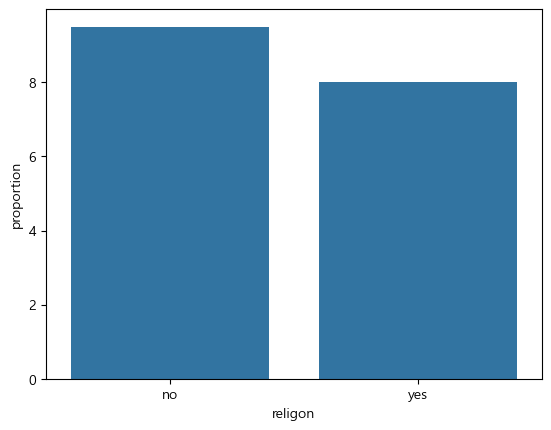

In [62]:
sns.barplot(data = rel_div, x = 'religon', y = 'proportion')

#### 연령대 및 종교 유무에 따른 이혼율

In [63]:
age_div = welfare.query('marriage != "etc"')\
    .groupby('ageg', as_index = False)\
    ['marriage']\
    .value_counts(normalize = True)

age_div

,ageg,marriage,proportion
0,middle,marriage,0.910302
1,middle,divorce,0.089698
2,old,marriage,0.914220
3,old,divorce,0.085780
4,young,marriage,0.950000
5,young,divorce,0.050000


In [64]:
age_div = age_div.query('ageg != "young" & marriage == "divorce"')\
    .assign(proportion = age_div['proportion'] * 100)\
    .round(1)

age_div

,ageg,marriage,proportion
1,middle,divorce,9.0
3,old,divorce,8.6


<Axes: xlabel='ageg', ylabel='proportion'>

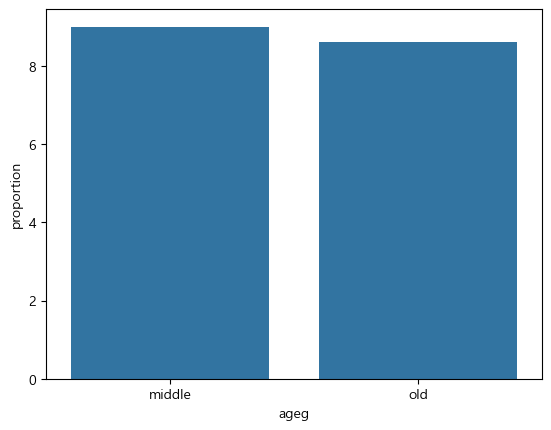

In [65]:
sns.barplot(data = age_div, x = "ageg", y = "proportion")

In [66]:
age_rel_div = welfare.query("marriage != 'etc' & ageg != 'young'")\
    .groupby(['ageg', 'religon'], as_index = False)\
    ['marriage']\
    .value_counts(normalize = True)

age_rel_div

,ageg,religon,marriage,proportion
0,middle,no,marriage,0.904953
1,middle,no,divorce,0.095047
2,middle,yes,marriage,0.917520
3,middle,yes,divorce,0.082480
4,old,no,marriage,0.904382
5,old,no,divorce,0.095618
6,old,yes,marriage,0.922222
7,old,yes,divorce,0.077778


In [67]:
age_rel_div = \
    age_rel_div.query('marriage == "divorce"')\
    .assign(proportion = age_rel_div['proportion'] * 100)\
    .round(1)

age_rel_div

,ageg,religon,marriage,proportion
1,middle,no,divorce,9.5
3,middle,yes,divorce,8.2
5,old,no,divorce,9.6
7,old,yes,divorce,7.8


<Axes: xlabel='ageg', ylabel='proportion'>

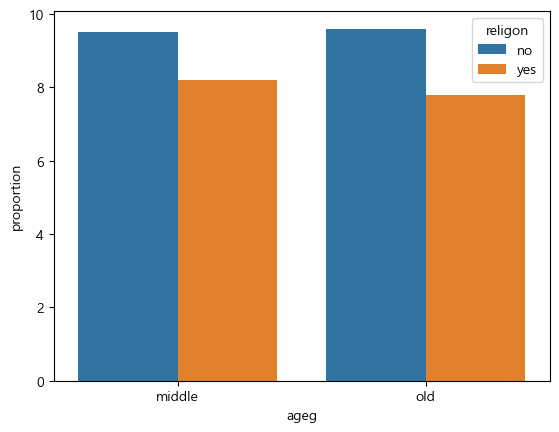

In [68]:
sns.barplot(data = age_rel_div, x = 'ageg' , y = 'proportion', hue = 'religon')

#### 지역별 연령대 비율

In [69]:
welfare['code_region'].dtypes

dtype('float64')

In [70]:
welfare['code_region'].value_counts()

code_region
2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: count, dtype: int64

In [71]:
list_region = pd.DataFrame(
    {
        'code_region' : [1,2,3,4,5,6,7],
        'region' : [
            '서울',
            '수도권',
            '부산/경남/울산',
            '대구/경북',
            '대전/충남',
            '강원/충북',
            '광주/전남/전북/제주도'
        ]
    }
)

list_region

,code_region,region
0,1,서울
1,2,수도권
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [72]:
welfare = welfare.merge(list_region, how = 'left', on = 'code_region')

In [73]:
welfare[['code_region', 'region']].head()

,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울


In [75]:
region_age = welfare.groupby('region', as_index = False)\
    ['ageg']\
    .value_counts(normalize = True)


region_age

,region,ageg,proportion
0,강원/충북,old,0.459103
1,강원/충북,middle,0.308707
2,강원/충북,young,0.232190
3,광주/전남/전북/제주도,old,0.449311
4,광주/전남/전북/제주도,middle,0.317924
5,광주/전남/전북/제주도,young,0.232766
6,대구/경북,old,0.504051
7,대구/경북,middle,0.296296
8,대구/경북,young,0.199653
9,대전/충남,old,0.413372


In [78]:
region_age = region_age.assign(proportion = region_age['proportion'] * 100).round(1)

region_age

,region,ageg,proportion
0,강원/충북,old,45.9
1,강원/충북,middle,30.9
2,강원/충북,young,23.2
3,광주/전남/전북/제주도,old,44.9
4,광주/전남/전북/제주도,middle,31.8
5,광주/전남/전북/제주도,young,23.3
6,대구/경북,old,50.4
7,대구/경북,middle,29.6
8,대구/경북,young,20.0
9,대전/충남,old,41.3


<Axes: xlabel='proportion', ylabel='region'>

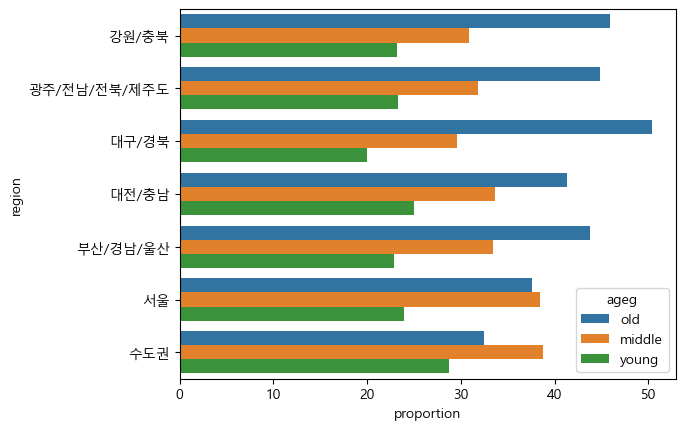

In [79]:
sns.barplot(data = region_age, y = 'region', x = 'proportion', hue = 'ageg')

In [81]:
pivot_df = region_age[['region', 'ageg', 'proportion']].pivot(index = 'region', columns = 'ageg', values = 'proportion')

pivot_df

ageg,middle,old,young
region,,,
강원/충북,30.9,45.9,23.2
광주/전남/전북/제주도,31.8,44.9,23.3
대구/경북,29.6,50.4,20.0
대전/충남,33.6,41.3,25.0
부산/경남/울산,33.4,43.8,22.9
서울,38.5,37.6,23.9
수도권,38.8,32.5,28.7


<Axes: ylabel='region'>

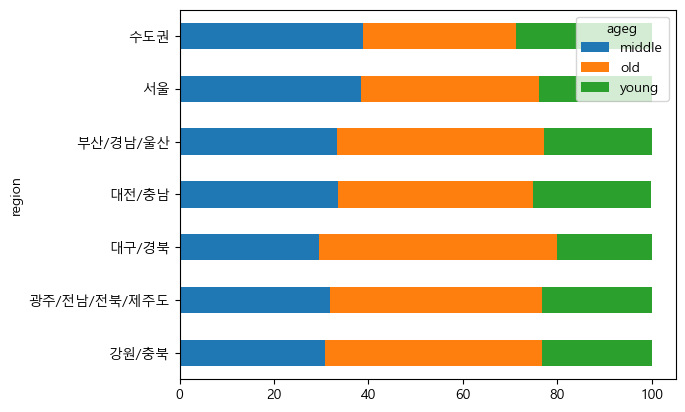

In [82]:
pivot_df.plot.barh(stacked = True)

In [83]:
reorder_df = pivot_df.sort_values('old')[['young', 'middle', 'old']]
reorder_df

ageg,young,middle,old
region,,,
수도권,28.7,38.8,32.5
서울,23.9,38.5,37.6
대전/충남,25.0,33.6,41.3
부산/경남/울산,22.9,33.4,43.8
광주/전남/전북/제주도,23.3,31.8,44.9
강원/충북,23.2,30.9,45.9
대구/경북,20.0,29.6,50.4


<Axes: ylabel='region'>

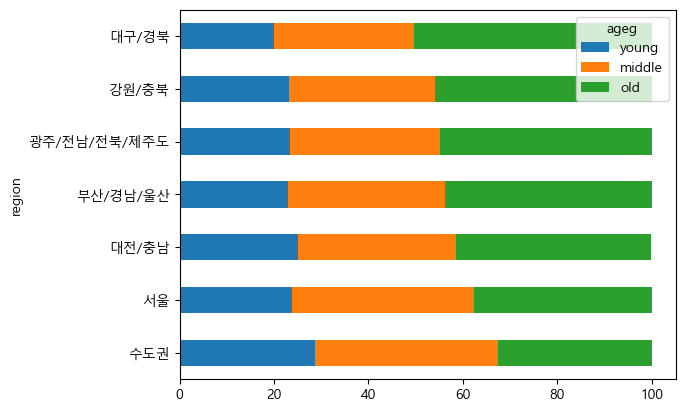

In [85]:
reorder_df.plot.barh(stacked = True)